## Evaluation (Qualitative and Quantitative) of LACosmic on HST CR test dataset


#### Step 0: Import all the packages (including from CRNet Model)

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import sys
import shutil
import tarfile
import urllib
import seaborn as sns   
import torch
from astropy.visualization import ZScaleInterval, ImageNormalize, LogStretch, AsinhStretch
import astroscrappy.astroscrappy as lac
import matplotlib.pyplot as plt

from CRNet import evaluate
from CRNet import CRNet
from CRNet.evaluate import roc, roc_lacosmic
from CRNet import train
from CRNet.util import plot_cr_detection_diagnostics     

In [2]:
BASE_DIR = os.path.join('/scratch/srinadb/CRNet/CRNet/deepCR.ACS-WFC')
print(BASE_DIR)

OUT_DIR = os.path.join("LACosmic", "")  # -> "ACS-WFC-BN/"
os.makedirs(OUT_DIR, exist_ok=True)
print(OUT_DIR)


/scratch/srinadb/CRNet/CRNet/deepCR.ACS-WFC
LACosmic/


#### Testing LACosmic (http://www.astro.yale.edu/dokkum/lacosmic/) using sigclip as threshold (to balance true detection and false detection)

In [3]:
# Test
def model_test():
    test_dirs = np.load(os.path.join(BASE_DIR,'test_dirs.npy'),allow_pickle = True)
    
    field_type = {'10120_3': 'GC', '11340_11': 'GC', '9694_6': 'EX', '10342_3': 'GAL',   
                 '10407_3': 'GAL', '13364_95': 'GAL', '11586_5':'GC', '12438_1': 'EX', 
                 '10092_1': 'EX', '12602_1': 'GC', '12058_6': 'GAL', '13804_6': 'GAL'
                 }

    f814_test_field_dirs = {'GC': [], 'EX': [], 'GAL': []}
    f606_test_field_dirs = {'GC': [], 'EX': [], 'GAL': []}
    f435_test_field_dirs = {'GC': [], 'EX': [], 'GAL': []}

    for _dir in test_dirs:
        arr = _dir.split('/')
        _filter = arr[-4]
        key = f'{arr[-3]}_{arr[-2]}'
        f_type = field_type[key]
        if _filter == 'f435w':
            f435_test_field_dirs[f_type].append(_dir)
        elif _filter == 'f606w':
            f606_test_field_dirs[f_type].append(_dir)
        elif _filter == 'f814w':
            f814_test_field_dirs[f_type].append(_dir)

    
    ''' *****************************************************************************************************************************
    Testing LACosmic
    *****************************************************************************************************************************

    '''

    print('------------------------------------------------------------')
    print('Testing LACosmic on F435W testset')
    print('------------------------------------------------------------')
    for f_type in list(f435_test_field_dirs.keys()):
        filter_field_test_dirs = f435_test_field_dirs[f_type]
        tpr_fpr, tpr_fpr_dilate = roc_lacosmic(sigclip=np.linspace(1,10,10), image=filter_field_test_dirs[::50], dilate = True)

        tpr,fpr = tpr_fpr

        tpr_d,fpr_d = tpr_fpr_dilate
        fpr_d = fpr

        np.save(os.path.join(OUT_DIR,f'F435W_{f_type}_LACosmic.npy'),[[tpr,fpr],[tpr_d,fpr_d]])

    print('------------------------------------------------------------')
    print('Testing LACosmic on F606W testset')
    print('------------------------------------------------------------')
    for f_type in list(f606_test_field_dirs.keys()):
        filter_field_test_dirs = f606_test_field_dirs[f_type]
        tpr_fpr, tpr_fpr_dilate = roc_lacosmic(sigclip=np.linspace(1,10,10), image=filter_field_test_dirs[::50], dilate = True)

        tpr,fpr = tpr_fpr

        tpr_d,fpr_d = tpr_fpr_dilate
        fpr_d = fpr

        np.save(os.path.join(OUT_DIR,f'F606W_{f_type}_LACosmic.npy'),[[tpr,fpr],[tpr_d,fpr_d]])

    print('------------------------------------------------------------')
    print('Testing LACosmic on F814W testset')
    print('------------------------------------------------------------')
    for f_type in list(f814_test_field_dirs.keys()):
        filter_field_test_dirs = f814_test_field_dirs[f_type]
        tpr_fpr, tpr_fpr_dilate = roc_lacosmic(sigclip=np.linspace(1,10,10), image=filter_field_test_dirs[::50], dilate = True)

        tpr,fpr = tpr_fpr

        tpr_d,fpr_d = tpr_fpr_dilate
        fpr_d = fpr

        np.save(os.path.join(OUT_DIR,f'F814W_{f_type}_LACosmic.npy'),[[tpr,fpr],[tpr_d,fpr_d]])

    return None

model_test()

------------------------------------------------------------
Testing LACosmic on F435W testset
------------------------------------------------------------


100%|██████████| 9/9 [00:33<00:00,  3.77s/it]


------------------------------------------------------------
Testing LACosmic on F606W testset
------------------------------------------------------------


100%|██████████| 21/21 [01:19<00:00,  3.81s/it]


------------------------------------------------------------
Testing LACosmic on F814W testset
------------------------------------------------------------


100%|██████████| 21/21 [01:20<00:00,  3.82s/it]


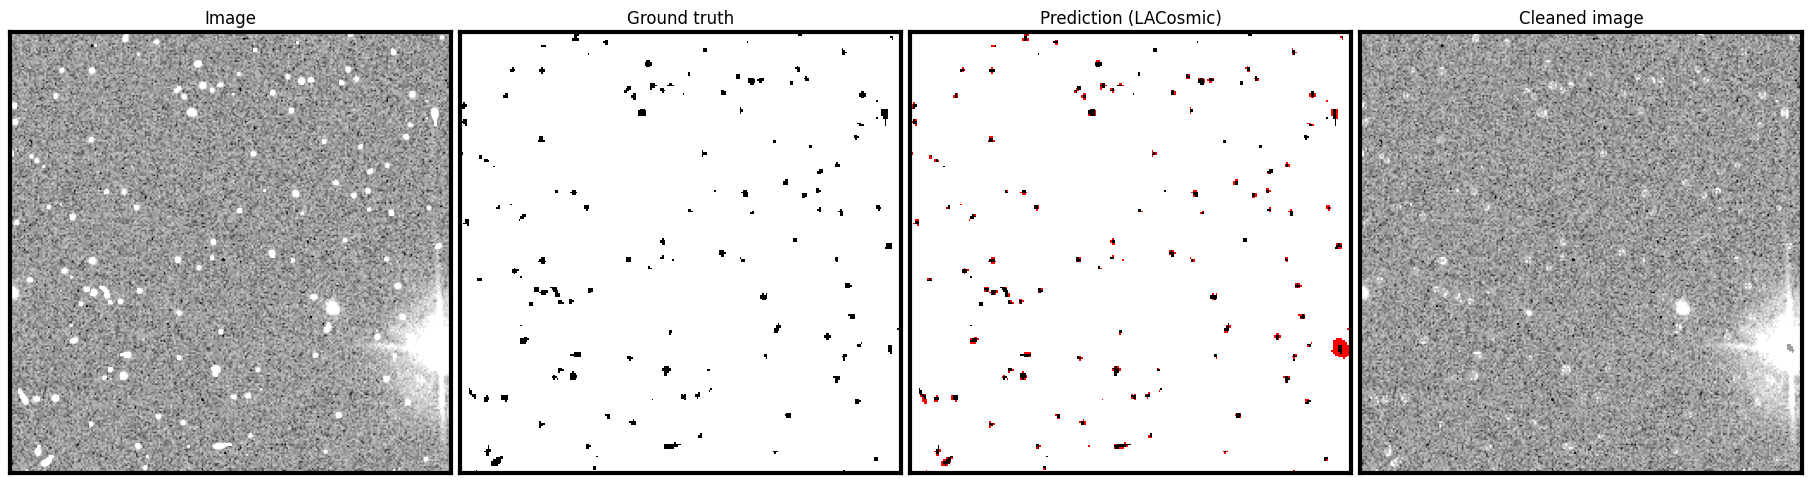

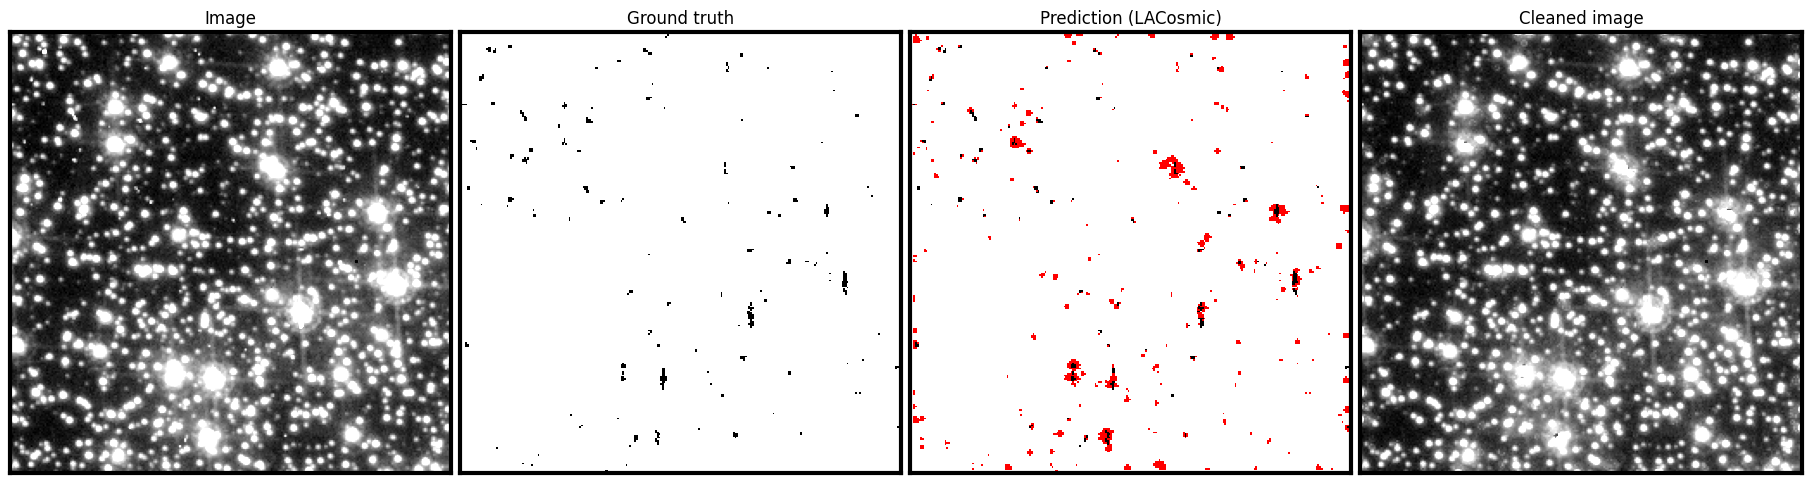

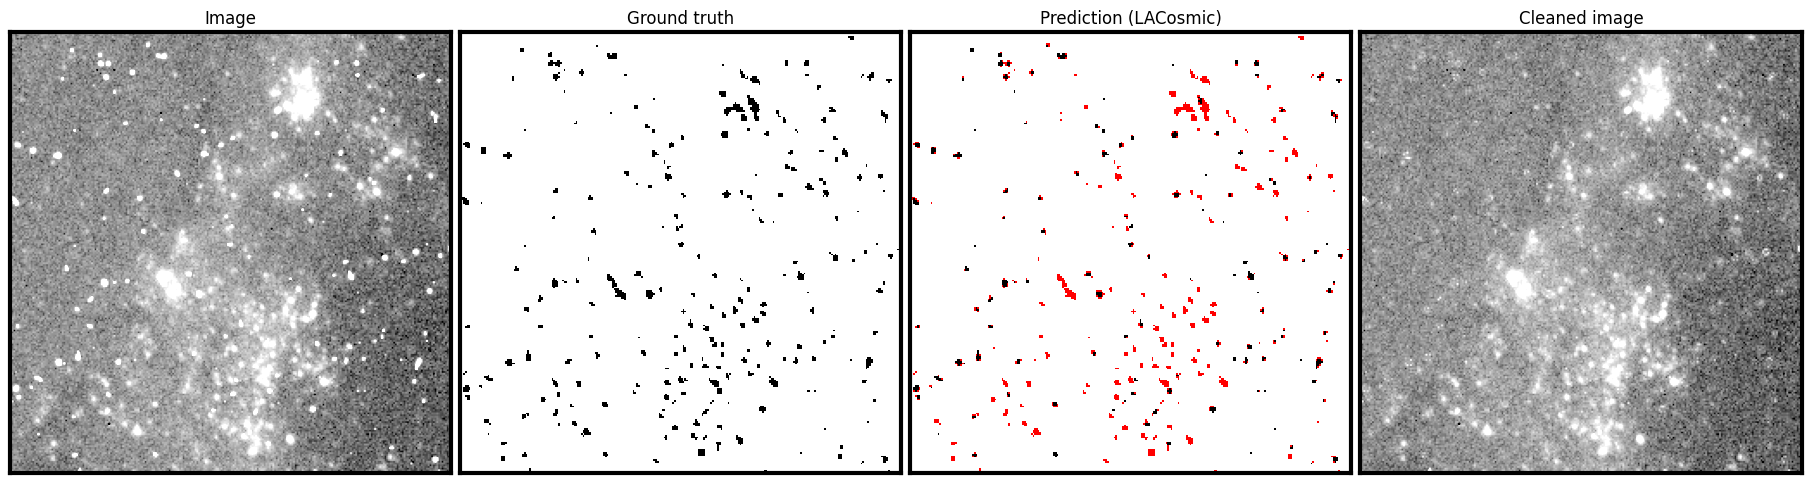

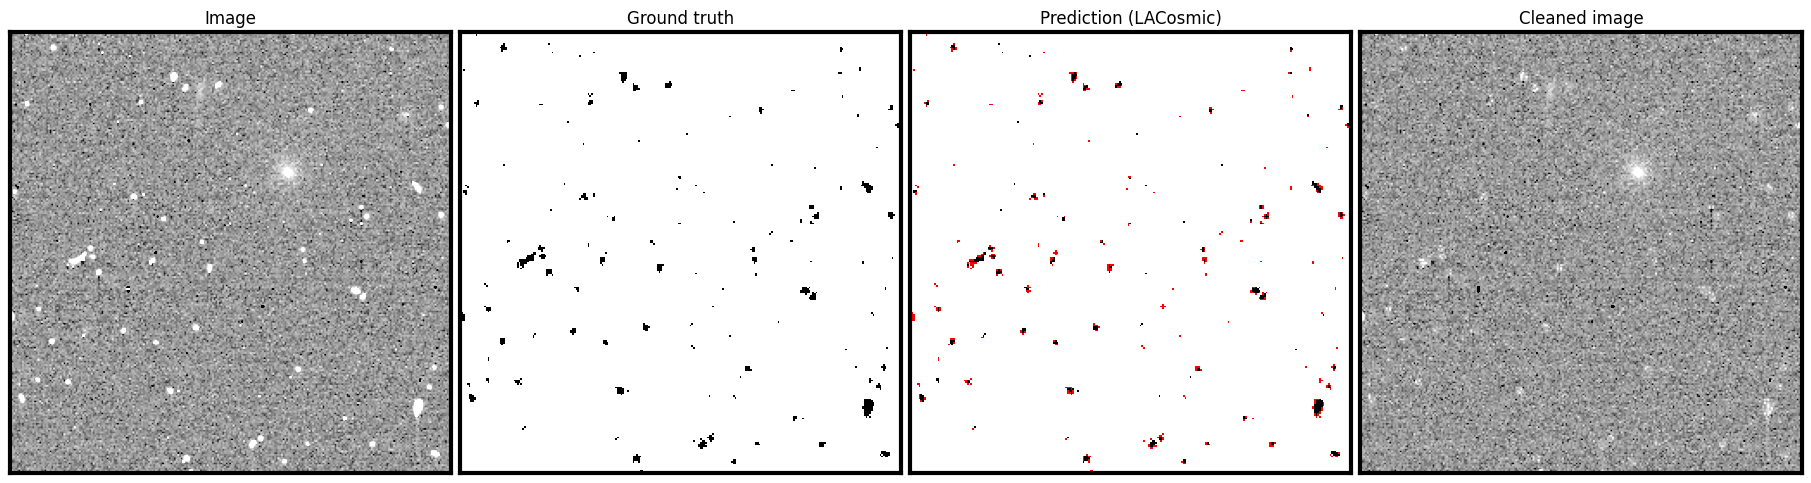

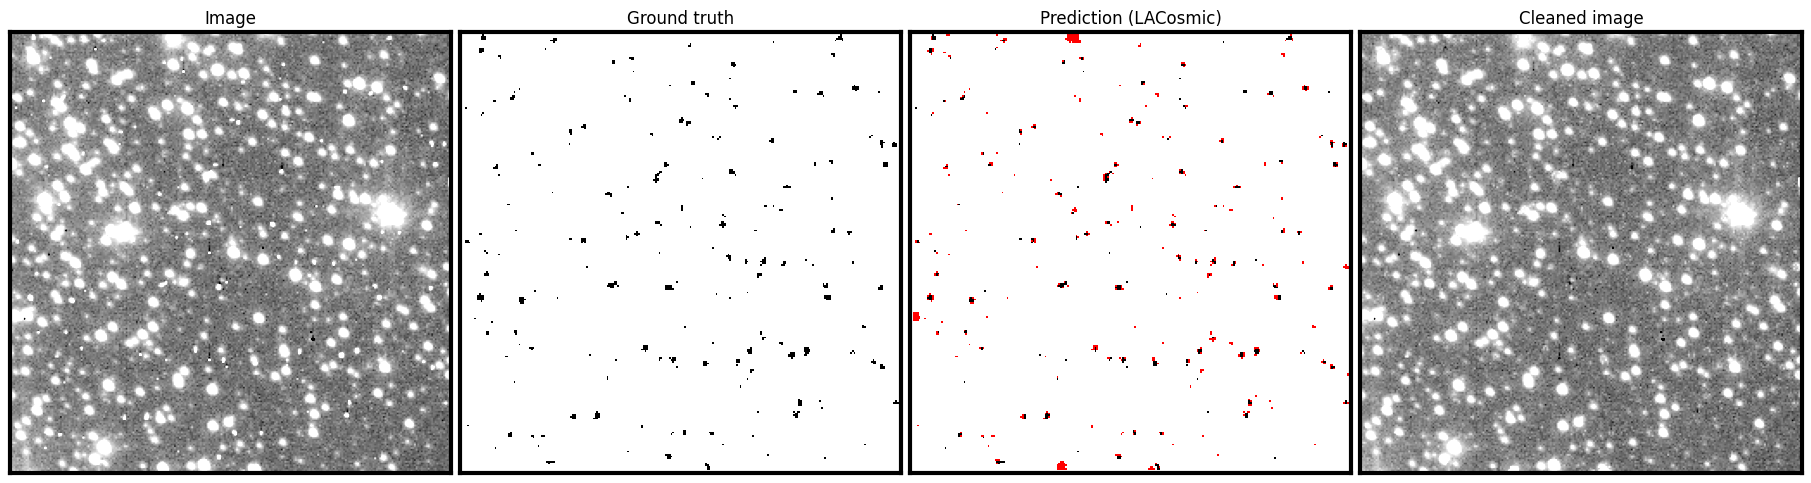

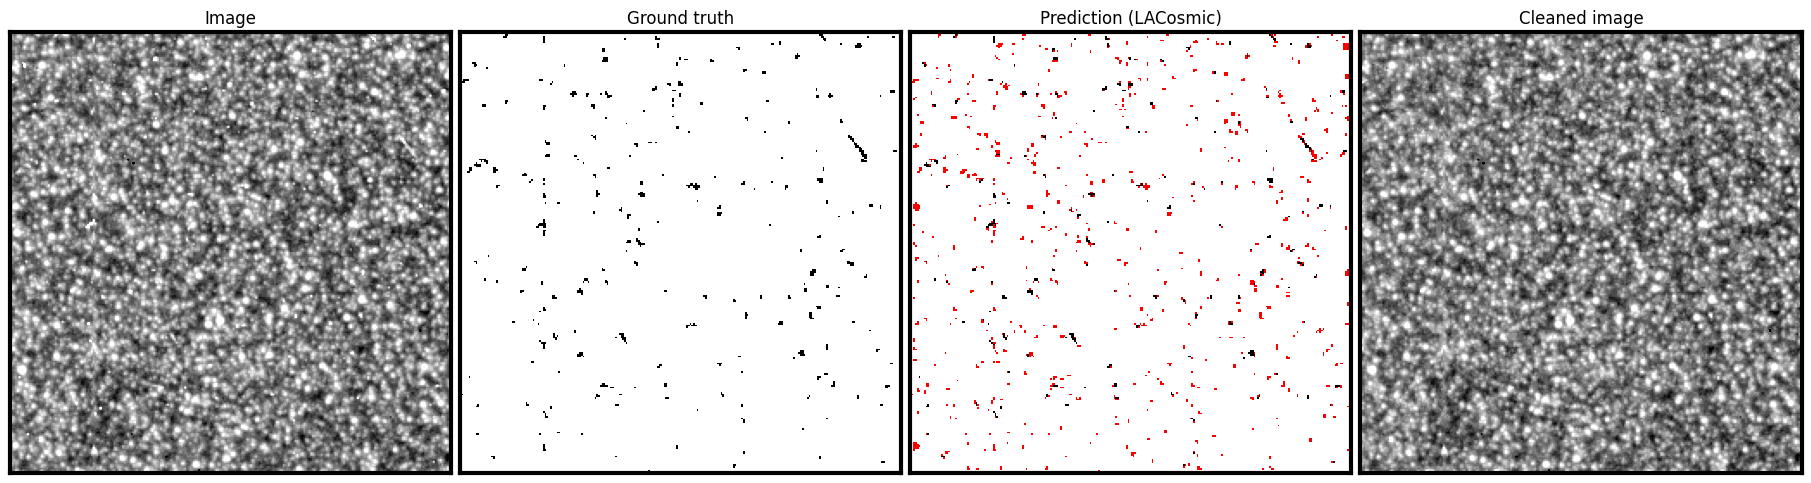

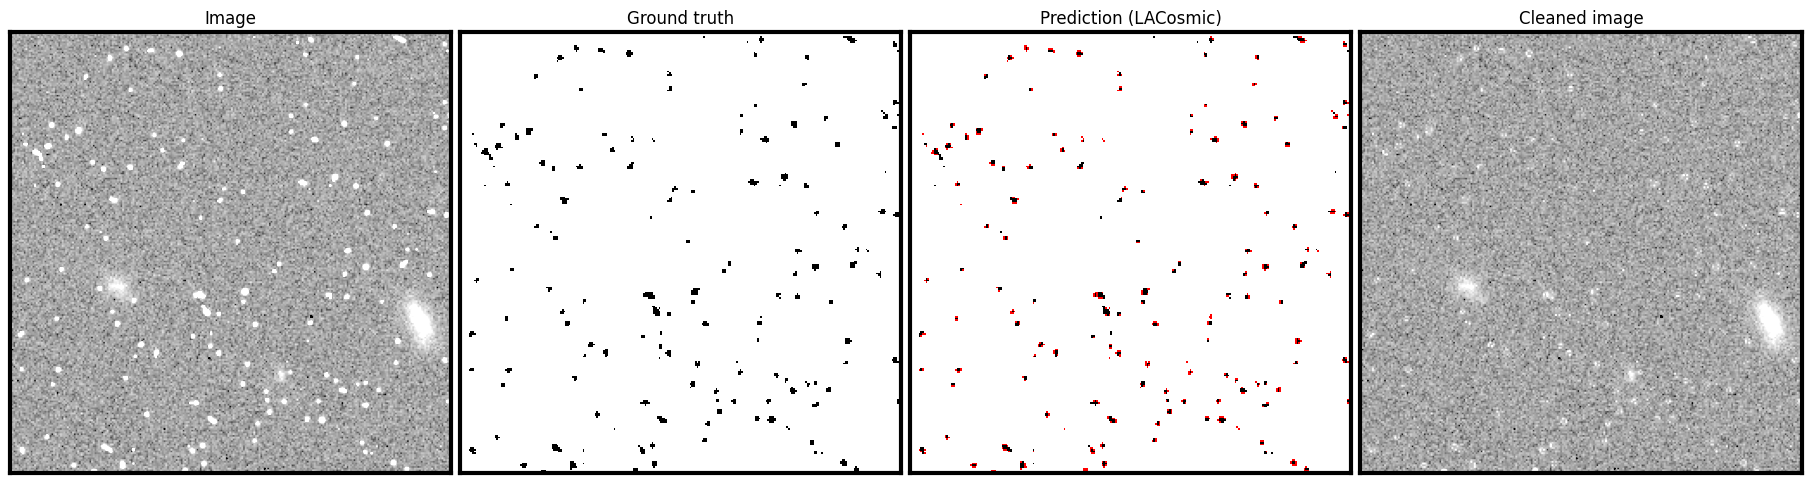

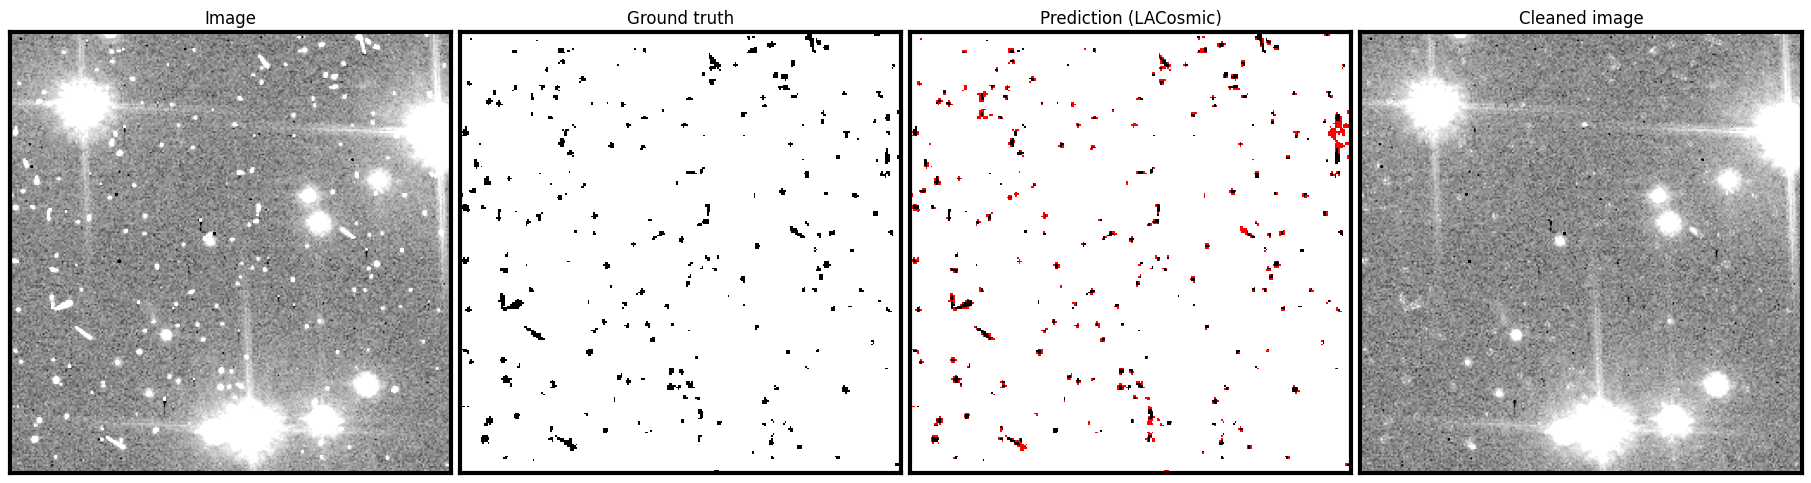

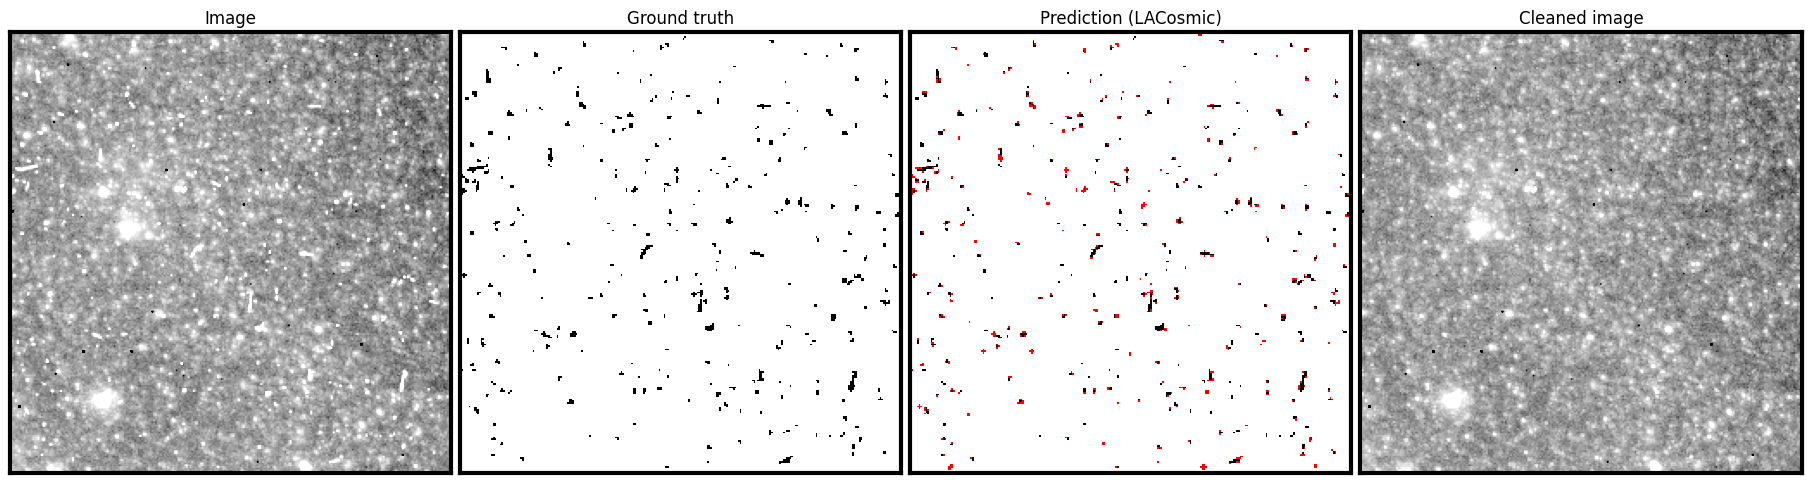

In [4]:
COMMON_KWARGS = dict(
    sigclip=10, sigfrac=0.3,
    gain=1, readnoise=5,
    satlevel=np.inf, sepmed=False,
    cleantype='medmask', niter=4
)

examples = [
    # ---------- F435W ----------
    ('f435w', '9694',  '6', '1_210.npy', 2.0,  'EX',  'F435W'),
    ('f435w', '10120', '3', '1_200.npy', 3.5,  'GC',  'F435W'),
    ('f435w', '10342', '3', '1_209.npy', 5.0,  'GAL', 'F435W'),

    # ---------- F606W ----------
    ('f606w', '12438', '1', '1_134.npy', 2.0,  'EX',  'F606W'),
    ('f606w', '11586', '5', '1_100.npy', 3.5,  'GC',  'F606W'),
    ('f606w', '10407', '3', '1_156.npy', 5.0,  'GAL', 'F606W'),

    # ---------- F814W ----------
    ('f814w', '10092', '1', '1_210.npy', 2.0,  'EX',  'F814W'),
    ('f814w', '12602', '1', '1_129.npy', 3.5,  'GC',  'F814W'),
    ('f814w', '13804', '6', '1_200.npy', 5.0,  'GAL', 'F814W'),
]

for flt, prop, visit, fname, objlim, field, filt_tag in examples:

    npy_path = os.path.join(
        BASE_DIR, 'data', 'npy_test',
        flt, prop, visit, fname
    )

    data = np.load(npy_path)

    pdt_mask, cleanArr = lac.detect_cosmics(
        data[0],
        objlim=objlim,
        **COMMON_KWARGS
    )

    plot_cr_detection_diagnostics(
        data[0], data[1],
        pdt_mask, cleanArr,
        model_name="LACosmic",
        save_path=os.path.join(
            OUT_DIR, f"{filt_tag}_{field}_LACosmic.png"
        )
    )
